# Matplotlib Basics — Advanced Practice (with Solutions)

This notebook contains **advanced (but not too advanced)** practice problems on Matplotlib fundamentals.

**Best practices used throughout:**
- Consistent figure sizing (`figsize`), labels, titles
- Legends only when needed
- Grid + sensible transparency (`alpha`)
- Use the OO interface (`fig, ax = plt.subplots()`)
- Reproducible randomness (`np.random.default_rng`)
- Clear separation of **Problem** and **Solution**


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# A consistent style for the whole notebook
plt.style.use('seaborn-v0_8-darkgrid')

# Reproducibility
rng = np.random.default_rng(42)

mpl.__version__

'3.10.7'

## Helper: synthetic dataset

We'll generate a small dataset once and reuse it in multiple exercises.

In [2]:
n = 600

# Two clusters + noise
x1 = rng.normal(loc=-1.5, scale=1.0, size=n // 2)
y1 = 0.8 * x1 + rng.normal(loc=0.0, scale=0.8, size=n // 2)

x2 = rng.normal(loc=2.0, scale=1.2, size=n // 2)
y2 = -0.5 * x2 + rng.normal(loc=0.5, scale=0.9, size=n // 2)

df = pd.DataFrame({
    'x': np.concatenate([x1, x2]),
    'y': np.concatenate([y1, y2]),
    'group': ['A'] * (n // 2) + ['B'] * (n // 2),
})

# A time series for later problems
dates = pd.date_range('2025-01-01', periods=120, freq='D')
trend = np.linspace(0, 8, len(dates))
season = 1.2 * np.sin(np.linspace(0, 6 * np.pi, len(dates)))
noise = rng.normal(0, 0.6, len(dates))

ts = pd.Series(trend + season + noise, index=dates, name='value')

df.head(), ts.head()

(          x         y group
 0 -1.195283  0.425654     A
 1 -2.539984 -3.259076     A
 2 -0.749549  0.091423     A
 3 -0.559435 -0.710368     A
 4 -3.451035 -2.809888     A,
 2025-01-01   -0.793525
 2025-01-02   -0.035204
 2025-01-03    0.760422
 2025-01-04    0.689261
 2025-01-05    0.589028
 Freq: D, Name: value, dtype: float64)

---

# Problem 1 — Multi-line plot with annotations

Create a figure that shows **sin(x)** and **cos(x)** on the same axes for `x ∈ [-2π, 2π]`.

**Requirements:**
1. Use the OO API (`fig, ax = plt.subplots(...)`).
2. Add axis labels, a title, and a legend.
3. Add a **vertical line** at `x = 0` and annotate the point where `sin(x)` is **maximum** in the shown range.
4. Set x-ticks at multiples of `π` (e.g., `-2π, -π, 0, π, 2π`) with readable labels.

### Solution

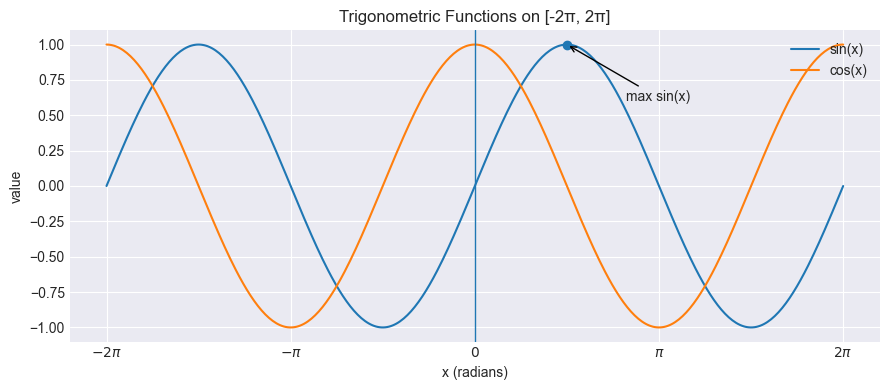

In [3]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 400)
y_sin = np.sin(x)
y_cos = np.cos(x)

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(x, y_sin, label='sin(x)')
ax.plot(x, y_cos, label='cos(x)')

# Vertical reference line
ax.axvline(0, linewidth=1)

# Max of sin in this range occurs at x = π/2 (within the interval)
x_max = np.pi / 2
y_max = 1.0
ax.scatter([x_max], [y_max], zorder=3)
ax.annotate(
    'max sin(x)',
    xy=(x_max, y_max),
    xytext=(x_max + 1.0, y_max - 0.4),
    arrowprops=dict(arrowstyle='->', linewidth=1),
)

ax.set_xlabel('x (radians)')
ax.set_ylabel('value')
ax.set_title('Trigonometric Functions on [-2π, 2π]')
ax.legend(loc='upper right')

# π ticks
ticks = [-2*np.pi, -np.pi, 0, np.pi, 2*np.pi]
ticklabels = [r'$-2\pi$', r'$-\pi$', r'$0$', r'$\pi$', r'$2\pi$']
ax.set_xticks(ticks, ticklabels)

fig.tight_layout()
plt.show()

---

# Problem 2 — Two subplots with shared x-axis

Build a `2x1` layout (two rows, one column) with **shared x-axis**:

- Top: plot the time series `ts`.
- Bottom: plot a **7-day rolling mean** of `ts`.

**Requirements:**
1. Share x-axis.
2. Add titles to each subplot.
3. Use `tight_layout()`.
4. Add a horizontal line at the overall mean of `ts` on the top subplot.

### Solution

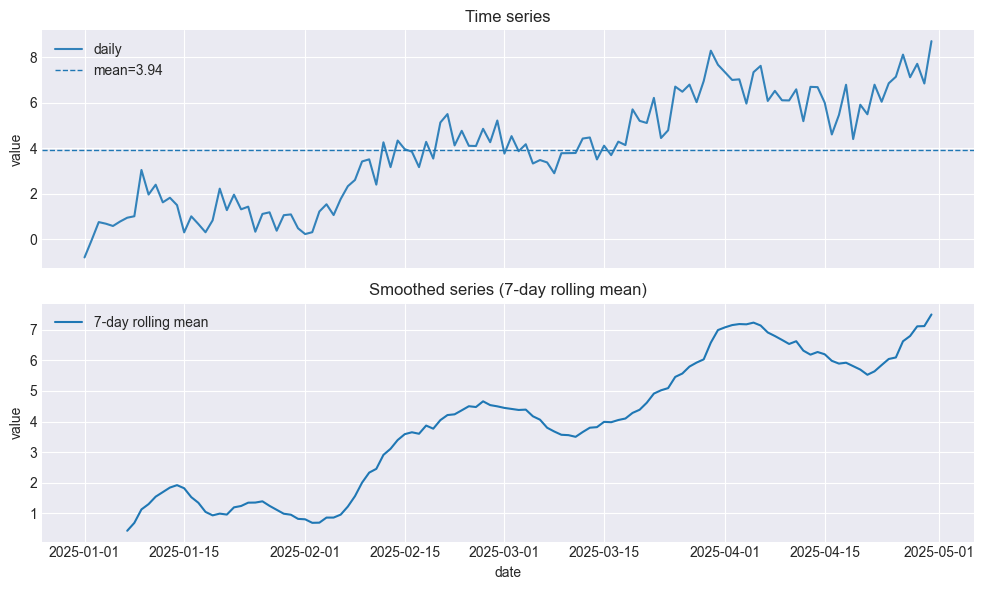

In [4]:
roll7 = ts.rolling(7).mean()
mu = ts.mean()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 6))

ax1.plot(ts.index, ts.values, label='daily', alpha=0.9)
ax1.axhline(mu, linewidth=1, linestyle='--', label=f'mean={mu:.2f}')
ax1.set_title('Time series')
ax1.set_ylabel('value')
ax1.legend(loc='upper left')

ax2.plot(roll7.index, roll7.values, label='7-day rolling mean')
ax2.set_title('Smoothed series (7-day rolling mean)')
ax2.set_xlabel('date')
ax2.set_ylabel('value')
ax2.legend(loc='upper left')

fig.tight_layout()
plt.show()

---

# Problem 3 — Scatter plot with color encoding + colorbar

Use `df` to create a scatter plot of `x` vs `y`, where point color represents the **distance from the origin**:

`r = sqrt(x^2 + y^2)`

**Requirements:**
1. Use `c=...` with a continuous colormap.
2. Add a colorbar labeled `distance`.
3. Keep points slightly transparent.
4. Set equal aspect ratio so distances look geometrically meaningful.

### Solution

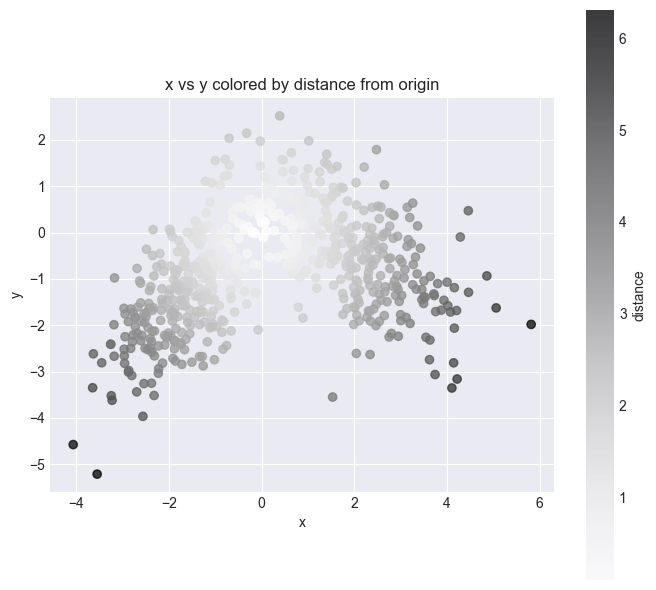

In [5]:
r = np.sqrt(df['x']**2 + df['y']**2)

fig, ax = plt.subplots(figsize=(7, 6))
sc = ax.scatter(df['x'], df['y'], c=r, alpha=0.75)

cbar = fig.colorbar(sc, ax=ax)
cbar.set_label('distance')

ax.set_title('x vs y colored by distance from origin')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal', adjustable='box')

fig.tight_layout()
plt.show()

---

# Problem 4 — Grouped scatter with custom legend

Plot `x` vs `y` for the two groups `A` and `B` from `df`.

**Requirements:**
1. Plot each group separately (filtering the DataFrame).
2. Add a legend with labels `Group A` and `Group B`.
3. Add a title and axis labels.
4. Add a text box in the plot showing group sizes.

### Solution

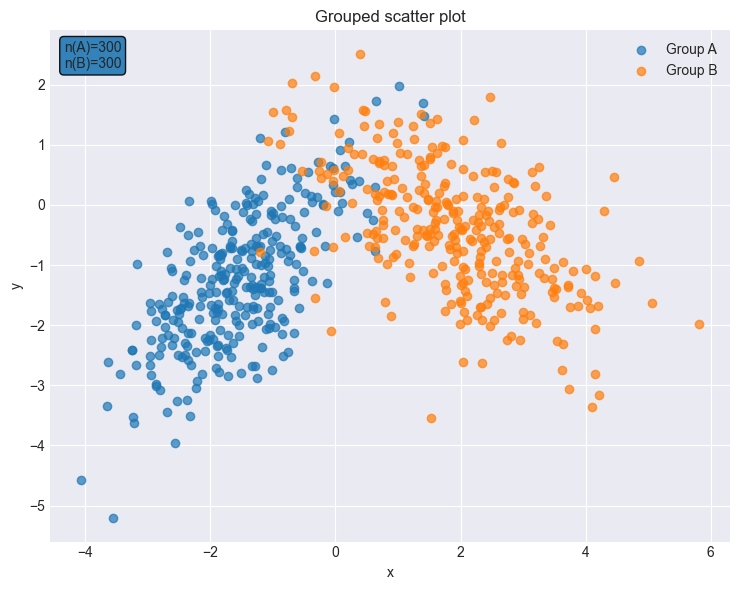

In [6]:
fig, ax = plt.subplots(figsize=(7.5, 6))

for g, label in [('A', 'Group A'), ('B', 'Group B')]:
    sub = df[df['group'] == g]
    ax.scatter(sub['x'], sub['y'], alpha=0.7, label=label)

ax.set_title('Grouped scatter plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best')

counts = df['group'].value_counts()
text = f"n(A)={counts.get('A', 0)}\n" + f"n(B)={counts.get('B', 0)}"
ax.text(
    0.02, 0.98, text,
    transform=ax.transAxes,
    va='top', ha='left',
    bbox=dict(boxstyle='round', alpha=0.9)
)

fig.tight_layout()
plt.show()

---

# Problem 5 — Histogram + KDE-like smooth curve (no seaborn)

Create a histogram of `df['x']` and overlay a smooth density-like curve **without seaborn**.

**Hint:** approximate a density by computing a histogram with `density=True` and then smoothing it with a simple moving average.

**Requirements:**
1. Show histogram with `density=True`.
2. Overlay a smoothed line on top.
3. Label axes and add a legend.

### Solution

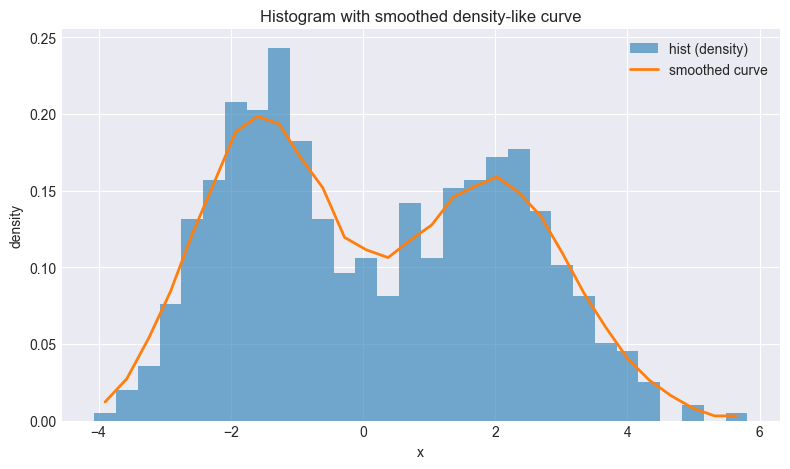

In [7]:
xvals = df['x'].to_numpy()

# Histogram as density
bins = 30
hist, edges = np.histogram(xvals, bins=bins, density=True)
centers = 0.5 * (edges[:-1] + edges[1:])

# Simple smoothing via moving average
window = 5
kernel = np.ones(window) / window
smooth = np.convolve(hist, kernel, mode='same')

fig, ax = plt.subplots(figsize=(8, 4.8))
ax.hist(xvals, bins=bins, density=True, alpha=0.6, label='hist (density)')
ax.plot(centers, smooth, linewidth=2, label='smoothed curve')

ax.set_title('Histogram with smoothed density-like curve')
ax.set_xlabel('x')
ax.set_ylabel('density')
ax.legend()

fig.tight_layout()
plt.show()

---

# Problem 6 — Twin y-axis (best-practice usage)

Create a plot with two y-axes using the time series `ts`:

- Left axis: `ts` values
- Right axis: cumulative sum of `ts` (after subtracting its mean so it doesn't explode too fast)

**Requirements:**
1. Use `ax.twinx()`.
2. Label both y-axes clearly.
3. Add a single combined legend.
4. Use `tight_layout()`.

### Solution

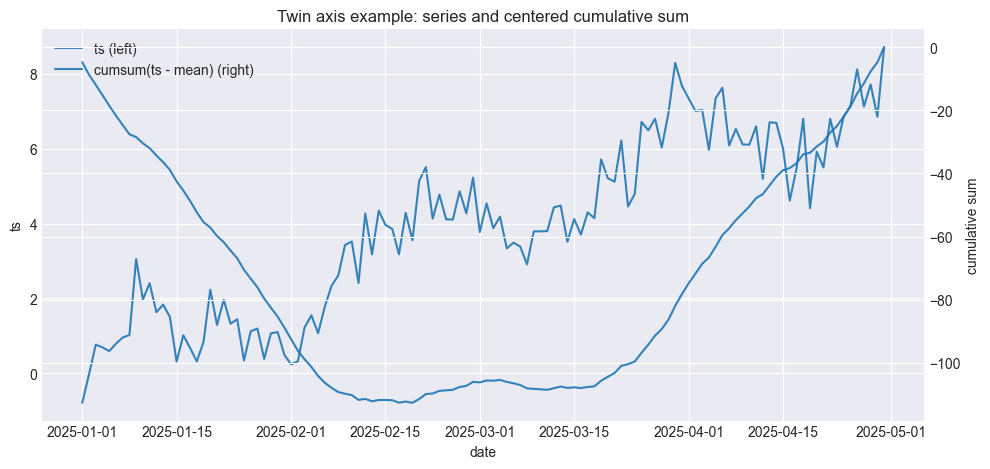

In [8]:
ts_centered = ts - ts.mean()
cumsum = ts_centered.cumsum()

fig, ax1 = plt.subplots(figsize=(10, 4.8))
line1 = ax1.plot(ts.index, ts.values, label='ts (left)', alpha=0.9)
ax1.set_xlabel('date')
ax1.set_ylabel('ts')

ax2 = ax1.twinx()
line2 = ax2.plot(ts.index, cumsum.values, label='cumsum(ts - mean) (right)', alpha=0.9)
ax2.set_ylabel('cumulative sum')

# One combined legend
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

ax1.set_title('Twin axis example: series and centered cumulative sum')

fig.tight_layout()
plt.show()

---

# Problem 7 — Multiple panels + consistent limits

Create a `2x2` subplot grid:

1. Top-left: scatter of group A
2. Top-right: scatter of group B
3. Bottom-left: both groups together
4. Bottom-right: histogram of `y`

**Requirements:**
1. The three scatter plots must share the **same x/y limits** so they are comparable.
2. Add a suptitle for the whole figure.
3. Use `constrained_layout=True` or `tight_layout()` (pick one).

### Solution

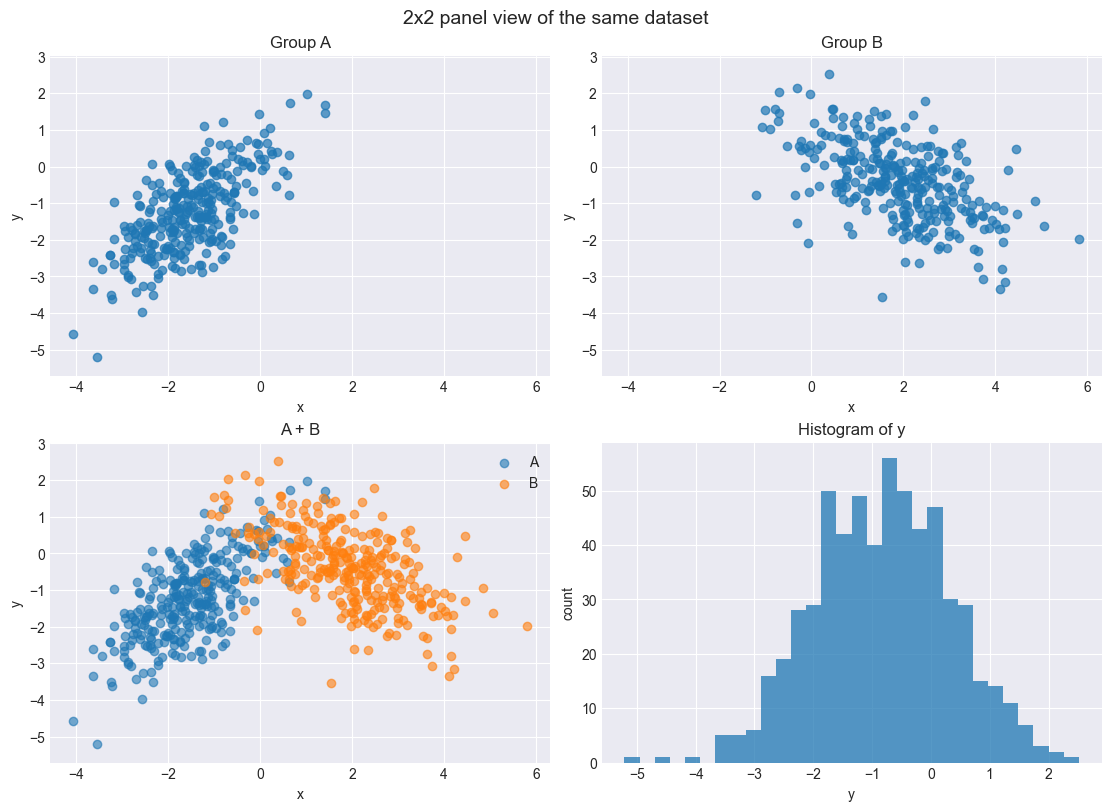

In [9]:
subA = df[df['group'] == 'A']
subB = df[df['group'] == 'B']

# Consistent limits from full data
xlim = (df['x'].min() - 0.5, df['x'].max() + 0.5)
ylim = (df['y'].min() - 0.5, df['y'].max() + 0.5)

fig, axes = plt.subplots(2, 2, figsize=(11, 8), constrained_layout=True)
ax00, ax01, ax10, ax11 = axes.ravel()

ax00.scatter(subA['x'], subA['y'], alpha=0.7)
ax00.set_title('Group A')
ax00.set_xlim(xlim); ax00.set_ylim(ylim)
ax00.set_xlabel('x'); ax00.set_ylabel('y')

ax01.scatter(subB['x'], subB['y'], alpha=0.7)
ax01.set_title('Group B')
ax01.set_xlim(xlim); ax01.set_ylim(ylim)
ax01.set_xlabel('x'); ax01.set_ylabel('y')

ax10.scatter(subA['x'], subA['y'], alpha=0.6, label='A')
ax10.scatter(subB['x'], subB['y'], alpha=0.6, label='B')
ax10.set_title('A + B')
ax10.set_xlim(xlim); ax10.set_ylim(ylim)
ax10.set_xlabel('x'); ax10.set_ylabel('y')
ax10.legend(loc='best')

ax11.hist(df['y'], bins=30, alpha=0.75)
ax11.set_title('Histogram of y')
ax11.set_xlabel('y'); ax11.set_ylabel('count')

fig.suptitle('2x2 panel view of the same dataset', fontsize=14)
plt.show()

---

# Problem 8 — Save figure correctly (and avoid common pitfalls)

Create any simple plot (e.g., `ts`) and save it as a PNG called `ts_plot.png`.

**Requirements:**
1. Use `fig.savefig(...)` (not `plt.savefig(...)`).
2. Use a reasonable dpi (e.g., 150–300).
3. Use `bbox_inches='tight'`.

### Solution

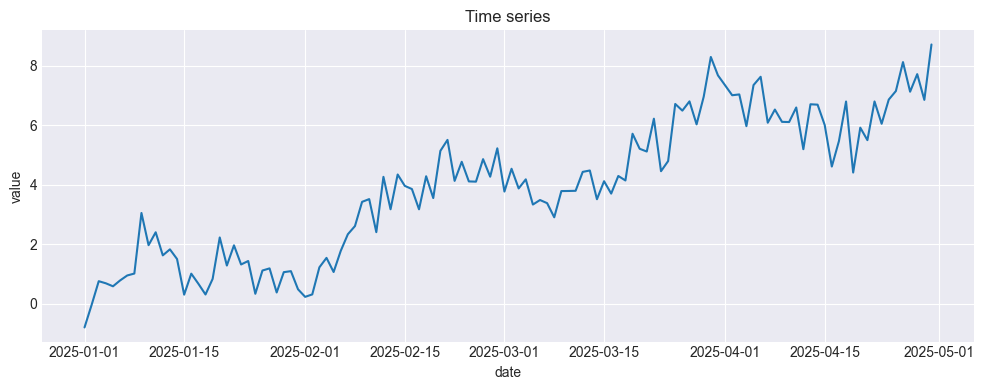

'Saved as ts_plot.png'

In [10]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(ts.index, ts.values)
ax.set_title('Time series')
ax.set_xlabel('date')
ax.set_ylabel('value')

fig.tight_layout()

# Save with best practices
fig.savefig('ts_plot.png', dpi=200, bbox_inches='tight')

plt.show()

"Saved as ts_plot.png"